# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [ ]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Image Data

In [ ]:
DATA_LIST = os.listdir('drive/My Drive/Class Challenge/CovidGD/all/train')
DATASET_PATH  = 'drive/My Drive/Class Challenge/CovidGD/all/train'
TEST_DIR =  'drive/My Drive/Class Challenge/CovidGD/all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [ ]:
from keras.applications.xception import Xception
sequential_1 = tf.keras.models.Sequential(Xception(include_top=False, weights="imagenet", input_shape=(224,224, 3),pooling=None,classes=1000,classifier_activation="softmax"))
for layer in sequential_1.layers:
    layer.trainable = False
for i, layer in enumerate(sequential_1.layers):
    print(i, layer.name, layer.trainable)
sequential_1.summary()

0 xception False
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
Total params: 20,861,480
Trainable params: 0
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
sequential_1.add(tf.keras.layers.Flatten())
#sequential_1.add(tf.keras.layers.Dropout(0.25))
sequential_1.add(tf.keras.layers.Dense(256, activation='relu'))
sequential_1.add(tf.keras.layers.Dense(4))
sequential_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 46,552,876
Trainable params: 25,691,396
Non-trainable params: 20,861,480
_________________________________________________________________


#### [5 points] Train Model

In [ ]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

sequential_1.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
model = sequential_1.fit(train_batches, validation_data=valid_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, 
                 validation_steps = STEP_SIZE_VALID)

22
6


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
21/21 [==============================] - 16s 515ms/step - loss: 16.9970 - accuracy: 0.3883 - val_loss: 5.8719 - val_accuracy: 0.3800
Epoch 2/40
21/21 [==============================] - 9s 442ms/step - loss: 2.9759 - accuracy: 0.5922 - val_loss: 2.6181 - val_accuracy: 0.6200
Epoch 3/40
21/21 [==============================] - 9s 438ms/step - loss: 2.3484 - accuracy: 0.6311 - val_loss: 1.2111 - val_accuracy: 0.6800
Epoch 4/40
21/21 [==============================] - 9s 436ms/step - loss: 1.5851 - accuracy: 0.6553 - val_loss: 2.0278 - val_accuracy: 0.6600
Epoch 5/40
21/21 [==============================] - 9s 426ms/step - loss: 1.7347 - accuracy: 0.6359 - val_loss: 1.2720 - val_accuracy: 0.6800
Epoch 6/40
21/21 [==============================] - 9s 439ms/step - loss: 1.0499 - accuracy: 0.7136 - val_loss: 0.6720 - val_accuracy: 0.7400
Epoch 7/40
21/21 [==============================] - 9s 444ms/step - loss: 0.9855 - accuracy: 0.7333 - val_loss: 1.9185 - val_accuracy: 0.6400
Epoc

#### [5 points] Plot Accuracy and Loss During Training

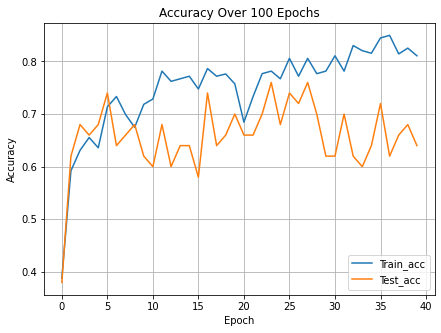

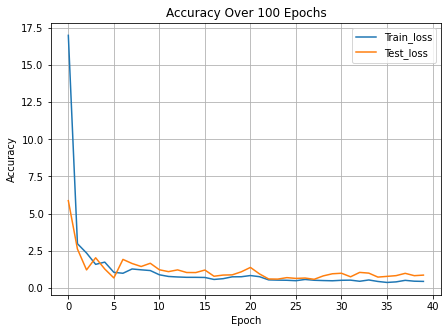

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0, figsize =(7,5))

#plt.subplot(1, 2, 1) 
plt.plot(model.history['accuracy'], label='Train_acc')
plt.grid()
plt.plot(model.history['val_accuracy'], label = 'Test_acc')
plt.title("Accuracy Over 100 Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.figure(1, figsize =(7,5))

#plt.subplot(1, 2, 2) 
plt.plot(model.history['loss'], label='Train_loss')
plt.grid()
plt.plot(model.history['val_loss'], label = 'Test_loss')
plt.title("Accuracy Over 100 Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

#### Testing Model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = sequential_1.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


36/36 [==============================] - 2s 36ms/step - loss: 0.5568 - accuracy: 0.7778
Test loss: 0.5568112730979919
Test accuracy: 0.7777777910232544


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


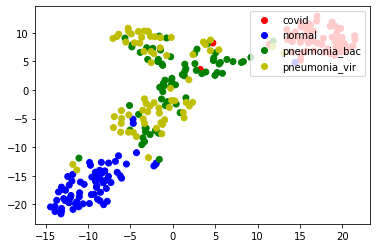

In [ ]:
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

intermediate_layer_model = tf.keras.Model(inputs=sequential_1.input,
                                        outputs=sequential_1.get_layer('dense').output)

tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

predictions = intermediate_layer_model.predict(tsne_data_generator)
labels = tsne_data_generator.labels

x_transformed = TSNE().fit_transform(predictions)

colors = []
for label in labels:
  if label == 0:
    colors.append("covid")
  elif label==1:
    colors.append("normal")
  elif label==2:
    colors.append("pneumonia_bac")
  else:
    colors.append("pneumonia_vir")

x_vals = [val[0] for val in x_transformed]
y_vals = [val[1] for val in x_transformed]
colours = ListedColormap(['r','b','g','y'])
scatter=plt.scatter(x_vals,y_vals, c = labels, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels = ["covid", "normal", "pneumonia_bac", "pneumonia_vir"], loc="upper right")
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->